# Attention Mechanism

### why?

* The problem with the `Ilya Sutskevar's ` encoder-decoder model was `too-long` input sequence

##### Problem with the encoder side:
* It was evident from the paper that after `35` words length input sequence, the machine translation started failing.

##### Problem with the decoder side:
* To find the translation of any word, we only need `one or a few input words`, but we don't get that, We are fed by `whole input sequence` and then told to translate.


## The solution:-

* Not all the input states are required to generate `an output`.
* Our decoder must know that which `timestamp` of encoder is important in printing a given `timestamp of output text`.
* So for that it needs to give `attention` on that.

## How to reach to this solution then?

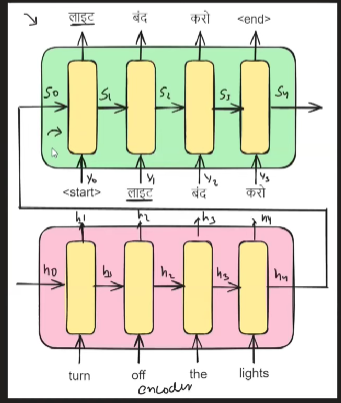

* For a `normal`,  `encoder-decoder` architecture, we can see that, in order to predict the output of any timestamp, we need, `previous decoder output` and `actual labelled output`.

* But in `attention mechanism`, we pass another `information`, $c_i$ ie., which `timestamp` of encoder is important in predicting the `current timestamp` output.

* Here, $c_i$ is a vector of dimension?
* sometime we will need only `one-timestamp info`, and sometime `a group of timestamp`.
* so dimension of $c_i$ is same, it will be `weighted sum of `timestamps` through a `weight` ${alpha}$

* each  ${alpha}$ gives information about the  importance of each input hidden state in predicting the `current timestamp output`, `given the prediction upto previous state has been done`.

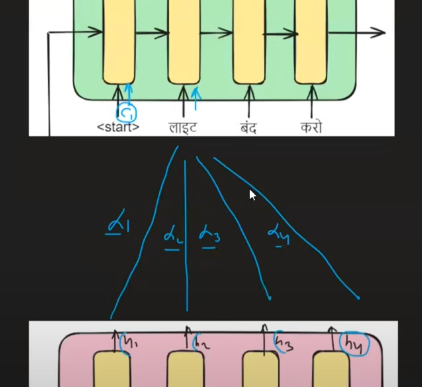

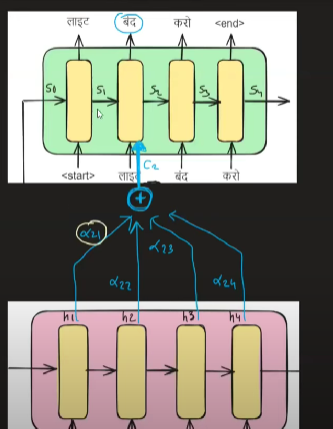

* weights will depend on $h_i$, the hidden states and $s_i$, previous states of decoder.
* Why?
* Bcoz, given the output has been found till now, which state of the `encoder` is important now.
* So it will depend on $S_i$, previous state of decoder as welll.

* So, weigths will be a function of $h_{i-1}$, and $s_{i-1}$.
* How to find this function?
* Simply, they applied `ANN`, and it found the respective weight.
* ANN was also a trainable, it was also adjusted.

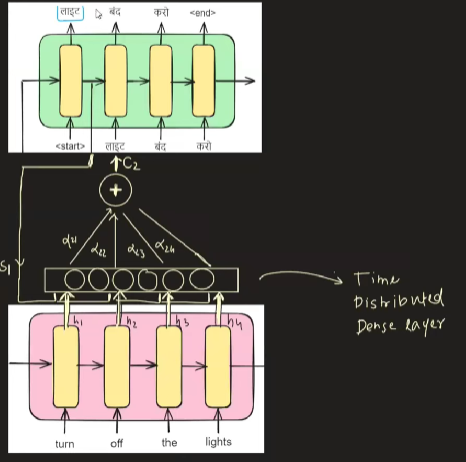


### sentence length V/s the different models.

* RNNSearch-50/30 is the `attention mechanism` model
* `50`  or `30` means it was trained on sentences upto that length, and then the prediction was made on varying length sentences.
* rest are normal `encoder-decoder`.

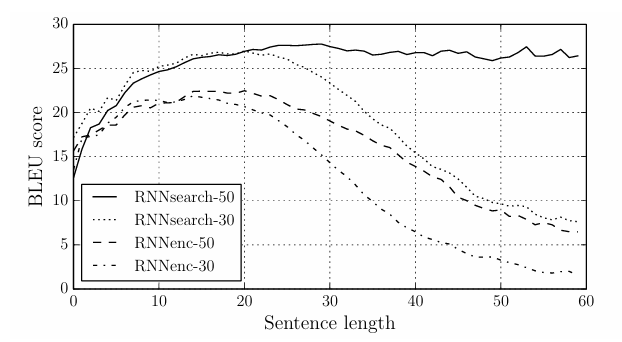

### plotting the weights:

* Here each pixel of this matrix is a corresponding weight:
* $alpha_{ij}$ , $j$-th source word for the $i$-th target word

  
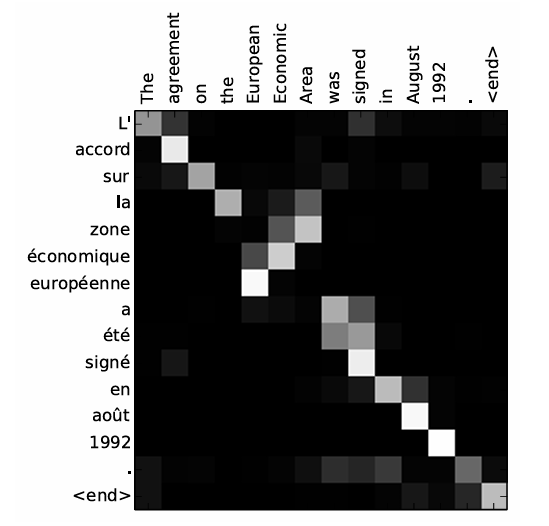

* To predict the `french` word, which `english` words are important - they are represented by `white/gray` boxes.
* The `white-color` represents their importance.

* From the grid its clear that the model is working quite good.


* bi-directional lstm was used `

# Research Paper 

#### 2015

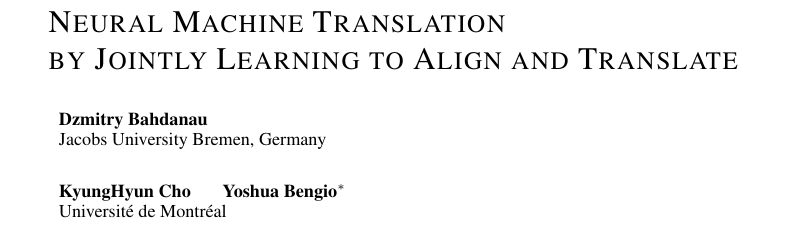

### Limitations in the previous encoder-decoder model:
* Compressing the input information to a fixed-lenght vector and then predicting the output of each time-stamp.

### This model:
* It learns to align and translate jointly.
* don't encode whole input sentence to fixed-lenght vector.
* Instead encode input sentence to a sequence of vector and chose a subset of vectors adaptively while decoding the translation.
* This frees it from squashing all the info of source sentence.
* This helps in coping with `longer sentences.`

### RNN Encoder - Decoder:
* Here $h_t$ is  $f(x_t, h_{t-1})$
* This model rather used `bidrectional RNN`

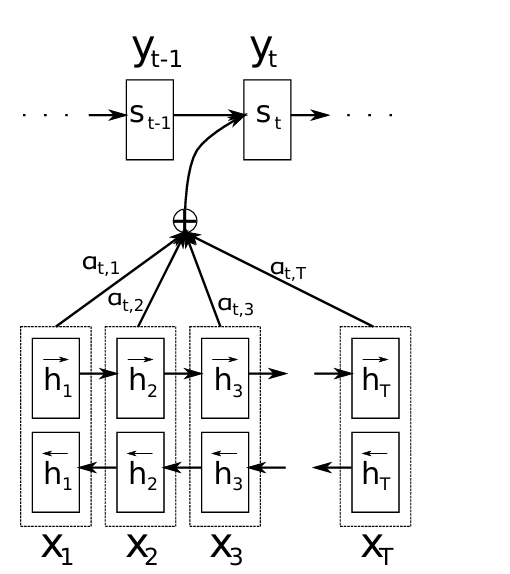

* Here the $c_i$ is weighted sum of $h_i$.
* Where weights $alpha$ is computed by feedforward Neural network
* Input for the `FF NN` are $h_i$ and $s_i$

### Performance of this model on length 50/30 V/s previous Encoder-decoder
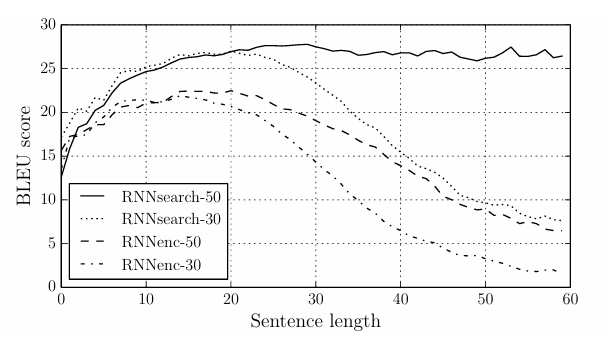

### Model settings:
* Minibatch of `80 sentences`.
*  with `SGD`, `Adadelta`.
* `5 days` training.
  

## challenge:
* Performance due to `unknown` words reduced.
* 

# Bahdanau Attention V/s Luong Attentionm

# Bahdanau Attention

### high level overview : 

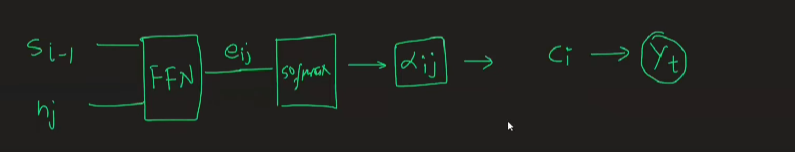

* Encoder remains the same.
* In decoder, we add `FFNN`.
* Output $y_{pred}$  is depend on $c_i$, $s_i$ and $y_i$

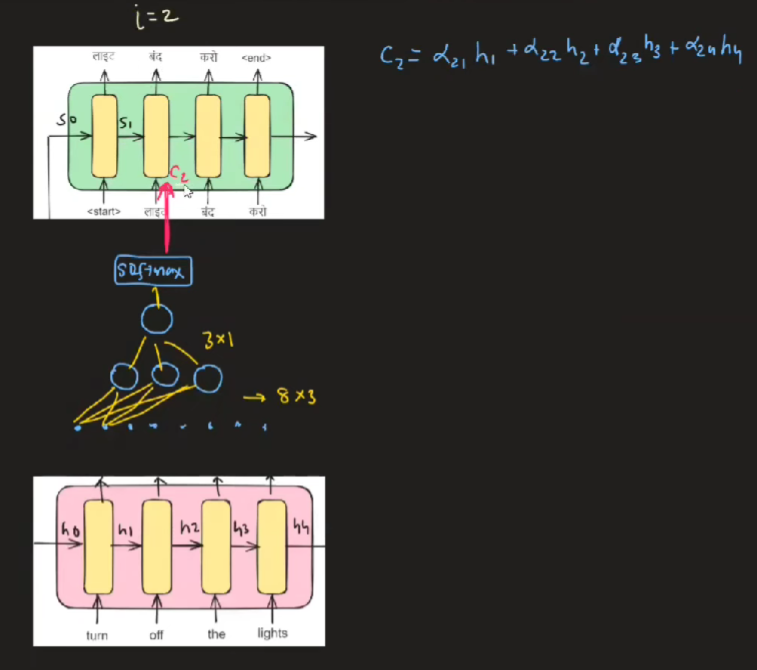

* to find the ${alpha}$, we need to concatenate $h_i$ with $s_i$

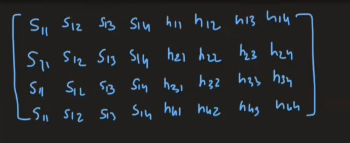


* We send each row of this matrix which is $f(s_{i-1}, h_j)$

* Now we send the calculated $c_i$, $s_i$, and $y_i$ to the `LSTM`, and LSTM will give $y_{pred}$.
* And the LSTM will give next state of decoder, $s_{i+1}$.

* The values of `weights ` in the `FNN` remains the same for a row, (whole sequence). At the end of the whole sequence, weights ar update during backpropagation.

* Since the fully connected layer weights remain same for a given sequence, it is called `time distributed FNN`.


### mathematical model of bahdanau attentions:

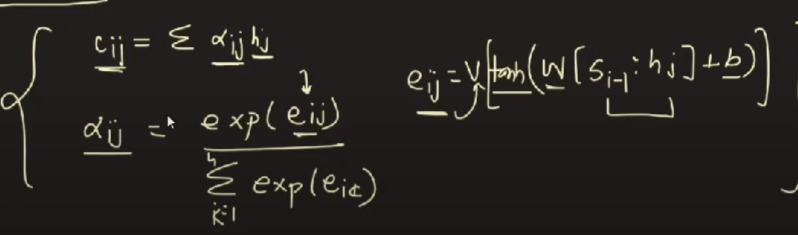

* First we find the $c_{ij}$ which is $sigma(\alpha_{ij}*h_j)$
* $\alpha_{ij}$ is calcualted with the softmax layer of $e_{ij}$
* $e_{ij}$ is the output of the `FNN`, i.e, tanh activation applied on $ W* [s_{i-1}, h_j] + b$

* THis model is also  ` additive attention:
  

# Luong attention:

* Here also, we calculate $c_i$, and try to find which timestamp of input will be important in calculating the current decoder output.
* $\alpha$ is calculated differently here.
* earlier we used `FNN`.
* It's simple, just dot product of $s_i$ and $h_j$.
* Also the current output depend not on the previous decoder state, rather the current decoder $s_i$.

* It is found better and  faster (lesser parameter)
* Multiplicatvie attention (since dot product is used.)

### output prediction:

* once we found the $c_i$ using $s_i$ and $h_i$, we concatenate $s_i$ and $c_i$.
* ie., we feed $[s_i: c_i]$ to the `fully connced network` .
* It will predict $\bar{S_i}$. And applying `softmax` on it, will give the $y_{pred}$

# how better than bahdanau attention

* our main task was to find which encoder states are important in predicting the decoder's output.
* this can be done with simple dot product of $s_i$ and $h_i$.
* Also using current $s_i$, gives more updated information than using the previous $s_{i-1}$.
* ie., we can update result dynamically.

* Context vector is concatenated in the output `FNN`, not in the input state `FNN` to predict the output.
* A